In [78]:
import pandas as pd
import numpy as np
'''
data = pd.read_csv("data.csv", delimiter=',')
data = pd.read_csv("/Users/RoosRiemersma/Documents/KI/jemoer/Leren_Beslissen/Roos/relevantQs.csv", delimiter=',')

clean_data = pd.read_csv("/Users/RoosRiemersma/Documents/KI/jemoer/Leren_Beslissen/Data/clean_data.csv", delimiter=',')

data = data.replace(" ", np.nan)
data.Q50 = data['Q50'].replace(",", ".")

nan = [index for index, row in data.iterrows() if row.isnull().sum() > 70]
data = data.drop(data.index[nan])

alt_columns = [column for column in data.columns.values if column[-3:] == 'alt']

data = data.drop(alt_columns, axis=1)
'''
data = pd.read_csv("data.csv", delimiter=';')
data


,Date,IdNummer,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q46_alt,Q47,Q48,Q49,Q50,Q51,Q51_alt,Q52,Q53,Q53_alt
0,9/26/2018 11:31:03 AM,3,Nee,,,,,,,,...,,,,,,,,,,
1,9/26/2018 11:42:25 AM,4,Ja,Ja,16 km (10 mijl),,10,,,Geen aparte trainingsperiode (ik train geduren...,...,,Man,48,180,81,"Hoger beroepsonderwijs (HBO), universiteit (WO)",,Nee,"Ja, namelijk ...",Ik begreep achteraf dat er voor de start ook e...
2,9/26/2018 11:43:13 AM,5,Ja,Ja,16 km (10 mijl),,9,Top!,,Geen aparte trainingsperiode (ik train geduren...,...,,Man,45,192,85,"Hoger beroepsonderwijs (HBO), universiteit (WO)",,"Ja, mijn email adres is ...",Nee,
3,9/26/2018 11:43:40 AM,6,Ja,Ja,16 km (10 mijl),,9,zoals alle jaren goed georganiseerd. En ondank...,,Niet of nauwelijks getraind,...,Work out van apple,Man,54,188,92,"Hoger beroepsonderwijs (HBO), universiteit (WO)",,"Ja, mijn email adres is ...",Nee,
4,9/26/2018 12:03:06 PM,7,Ja,Ja,16 km (10 mijl),,9,super gzellig ondanks de regen. leuke afwissel...,,Geen aparte trainingsperiode (ik train geduren...,...,,Man,50,172,89,Middelbaar beroepsonderwijs (MBO),,"Ja, mijn email adres is ...",Nee,
5,9/26/2018 12:09:14 PM,8,Ja,Ja,16 km (10 mijl),,9,Alles uitstekend georganiseerd met medewerking...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Na de finish had ik ook snel mijn ingeleverde ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Maar ook dat hoort erbij.,,12 weken of meer getraind,3 keer per week,Langer dan een jaar,Ik zou meer kilometers willen hardlopen,true,false,false,false,...,"Ja, mijn email adres is ...",Nee,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9/26/2018 12:16:45 PM,9,Ja,Ja,16 km (10 mijl),,9,,,Geen aparte trainingsperiode (ik train geduren...,...,,Vrouw,46,169,61,"Hoger beroepsonderwijs (HBO), universiteit (WO)",,"Ja, mijn email adres is ...",Nee,
9,9/26/2018 12:21:24 PM,10,Ja,Ja,16 km (10 mijl),,9,Prima evenement. Respect voor zoveel vrijwilli...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


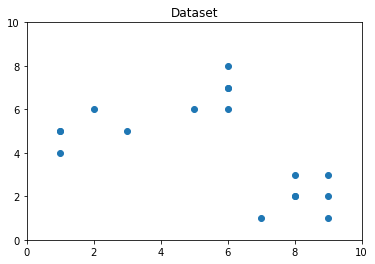

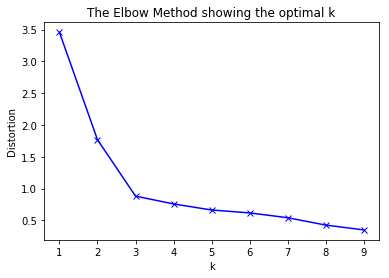

In [59]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
data = pd.read_csv("/Users/RoosRiemersma/Documents/KI/jemoer/Leren_Beslissen/Data/one_hot_data.csv", delimiter=',')
data = data.drop(['Q47_Man', 'Q47_Vrouw', 'Q48', 'Q49', 'Q50'], axis=1)

X = data.values

#distortions = []
#K = range(1,15)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k).fit(X)
#    kmeanModel.fit(X)
#    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_) #Sum of squared distances of samples to their closest cluster center.  
    
#plt.plot(K, distortions, 'bx-')
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()
